#  MACHINE LEARNING: Portugal Wine. Two Class approach for Red and White classification with Neural Network using R, NEURALNET Library and K fold cross-validation


By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | November 09, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
<hr>

# I Introduction

This project develops Neural Network algorithm of machine learning to classify the class of wine -"white" or "red"- according to 12 variables that characterize the wine subject to classification. I use Neuralnet R library.

Neuralnet is built to train multi-layer perceptrons in the context of regression analyses, i.e. to approximate functional relationships between covariates and response variables.

We will use the famous Portugal wine dataset. Two datasets are available of which one dataset is about red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. I have combined them into one dataset named "wine" and created one additional variable "type" with its categories "white" and "red".

The original data along with detailed description can be found here [ http://archive.ics.uci.edu/ml/datasets/Wine+Quality].

The columns of the "wine" dataset are the variables (features): fixed acidity; volatile acidity; citric acid; residual sugar; chlorides; free sulfur dioxide; total sulfur dioxide; density; pH; sulphates; alcohol; quality. The 13th column is the type of wine observed: white; red.

Our original dataset is an imbalance one. There are 6497 registers but only 1599 (24.6%) are of the red class of wine.

I consider the original dataset without the variables "density" and "free.sulfor.dioxide".

The dfffull dataset (use in the processing) keep all the register of the original database but replace the upper outliers by its corresponding <i>Threshold</i>.

I consider outliers those points that have any predictor variable value to be outside of the limits constructed by boxplots. The following rule is applied:

* A predictor value is considered to be an upper outlier only if it is greater than <b>Threshold = Q3 + 1.5IQR</b>

Application of this rule does not reduces the original datasize becouse it does not eliminate any register.  So, <i>dfffull</i> data size is the same as the original (6497 registers).

The model performance was evaluated using R, K fold cross-validation and the metrics Accuracy,	Specificity,	Recall,	Precision, F1. I considered 70% and 30% original dataset splitting for the training and testing datasets respectively.

# II Loading, EDA and Data Preprocessing

## 21 Loading the Data

In [117]:
# first remove ALL objects and close all possible connections
closeAllConnections()
rm(list = ls(all = TRUE)) # Does remove all inclusive hidden

# see your memory size
memory.size() 

In [8]:
# install packages and load libraries
ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, dependencies = c("Depends", "Suggests"))
    sapply(pkg, require, character.only = TRUE)
}
# usage
packages <- c("plyr", "dplyr", "neuralnet", "NeuralNetTools", "car","caret")
ipak(packages)


Loading required package: plyr
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: neuralnet
Warning message:
"package 'neuralnet' was built under R version 3.4.2"
Attaching package: 'neuralnet'

The following object is masked from 'package:dplyr':

    compute

Loading required package: NeuralNetTools
Warning message:
"package 'NeuralNetTools' was built under R version 3.4.2"Loading required package: car
Warning message:
"package 'car' was built under R version 3.4.2"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Loading required package: caret
Loading required package: lattice
Loading required package: g

plyr          dplyr      neuralnet NeuralNetTools            car 
          TRUE           TRUE           TRUE           TRUE           TRUE 
         caret 
          TRUE

In [38]:
# define path location of datasets
wine1.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine2.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# read datasets
wine1 <- read.csv(wine1.url, header=TRUE, sep=';')
wine2 <- read.csv(wine2.url, header=TRUE, sep=';')

# create dataset base
wine <- rbind(cbind(wine1, type= 1), cbind(wine2, type=0))

df= subset(wine, select=c('fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides' ,'total.sulfur.dioxide','pH', 'sulphates', 'alcohol', 'quality', 'type'))
attach(df)
head(df)
rm("wine", "wine1", "wine2")


The following object is masked _by_ .GlobalEnv:

    type



fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,type
7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,6,1
6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,6,1
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,1
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,1
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,1
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,1


In [59]:
# get some information about the dataset
str(df)

'data.frame':	6497 obs. of  11 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...
 $ type                : num  1 1 1 1 1 1 1 1 1 1 ...


In [10]:
#summarize full dataset by columns 
propmiss <- function(dataframe) {
	m <- sapply(dataframe, function(x) {
		data.frame(
			n=length(!is.na(x)), 
			nmiss=sum(is.na(x)), 
			propmiss=sum(is.na(x))/length(x),
			P25=round(quantile(x, 0.25, na.rm=TRUE),2),
			P75=round(quantile(x, 0.75, na.rm=TRUE),2),            
			IQR=round(IQR(x, na.rm=TRUE),2),
			Threshold= round(quantile(x, 0.75, na.rm=TRUE),2) + 1.5*round(IQR(x, na.rm=TRUE),2),            
			Minimum=round(min(x, na.rm=TRUE),2),
			Median=round(median(x, na.rm=TRUE),2),            
			Maximum=round(max(x, na.rm=TRUE),2),
			Range=round(max(x, na.rm=TRUE)-min(x, na.rm=TRUE),2),
			Mean=round(mean(x, na.rm=TRUE),2),
			StDev=round(sd(x, na.rm=TRUE),2)
		)
	})
	d <- data.frame(t(m))
	d <- sapply(d, unlist)
	d <- as.data.frame(d)
	d$variable <- row.names(d)
	row.names(d) <- NULL
	d <- cbind(d[ncol(d)],d[-ncol(d)])
	return(d[order(d$propmiss), ])
}

In [11]:
# summarize original df dataset
(summary1=propmiss(df[,-c(10:11)])[,-(3:4)])

variable,n,P25,P75,IQR,Threshold,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,6497,6.40,7.70,1.30,9.650,3.80,7.00,15.90,12.10,7.22,1.30
volatile.acidity,6497,0.23,0.40,0.17,0.655,0.08,0.29,1.58,1.50,0.34,0.16
citric.acid,6497,0.25,0.39,0.14,0.600,0.00,0.31,1.66,1.66,0.32,0.15
residual.sugar,6497,1.80,8.10,6.30,17.550,0.60,3.00,65.80,65.20,5.44,4.76
chlorides,6497,0.04,0.06,0.03,0.105,0.01,0.05,0.61,0.60,0.06,0.04
total.sulfur.dioxide,6497,77.00,156.00,79.00,274.500,6.00,118.00,440.00,434.00,115.74,56.52
pH,6497,3.11,3.32,0.21,3.635,2.72,3.21,4.01,1.29,3.22,0.16
sulphates,6497,0.43,0.60,0.17,0.855,0.22,0.51,2.00,1.78,0.53,0.15
alcohol,6497,9.50,11.30,1.80,14.000,8.00,10.30,14.90,6.90,10.49,1.19


In [12]:
# r code to replace outliers by the threshold of each variable
library(mlr)

Loading required package: ParamHelpers

Attaching package: 'mlr'

The following object is masked from 'package:caret':

    train



In [13]:
dfffull <- capLargeValues(df, target = "type",cols = c("fixed.acidity"),threshold = summary1[1,6])
dfffull <- capLargeValues(dfffull, target = "type",cols = c("volatile.acidity"),threshold = summary1[2,6])
dfffull <- capLargeValues(dfffull, target = "type",cols = c("citric.acid"),threshold = summary1[3,6])
dfffull <- capLargeValues(dfffull, target = "type",cols = c("residual.sugar"),threshold = summary1[4,6])
dfffull <- capLargeValues(dfffull, target = "type",cols = c("chlorides"),threshold = summary1[5,6])
dfffull <- capLargeValues(dfffull, target = "type",cols = c("total.sulfur.dioxide"),threshold = summary1[6,6])
dfffull <- capLargeValues(dfffull, target = "type",cols = c("pH"),threshold = summary1[7,6])
dfffull <- capLargeValues(dfffull, target = "type",cols = c("sulphates"),threshold = summary1[8,6])
dfffull <- capLargeValues(dfffull, target = "type",cols = c("alcohol"),threshold = summary1[9,6])
unloadNamespace("mlr")

In [64]:
# get some information about the dataset
str(dfffull)

'data.frame':	6497 obs. of  11 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  17.5 1.6 6.9 8.5 8.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...
 $ type                : num  1 1 1 1 1 1 1 1 1 1 ...


In [14]:
# remove and dettach df dataset
rm("df")
detach("df")

In [15]:
# rename dff dataset as df dataset to use the already created R scripts
df <- dfffull

# remove dff dataset
rm("dfffull")

In [16]:
head(df)


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,type
7.0,0.27,0.36,17.55,0.045,170,3.00,0.45,8.8,6,1
6.3,0.30,0.34,1.60,0.049,132,3.30,0.49,9.5,6,1
8.1,0.28,0.40,6.90,0.050,97,3.26,0.44,10.1,6,1
7.2,0.23,0.32,8.50,0.058,186,3.19,0.40,9.9,6,1
7.2,0.23,0.32,8.50,0.058,186,3.19,0.40,9.9,6,1
8.1,0.28,0.40,6.90,0.050,97,3.26,0.44,10.1,6,1


In [69]:
str(df)

'data.frame':	6497 obs. of  11 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  17.5 1.6 6.9 8.5 8.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...
 $ type                : num  1 1 1 1 1 1 1 1 1 1 ...


## 22 Exploratory Data Analysis (EDA) and Data Preprocessing

This Exploratory Data Analysis and Data Preprocessing unit has been done in another project already. The results and the R code [can be found here ](http://nbviewer.jupyter.org/github/arqmain/Machine_Learning/blob/master/R_MLearning/MLearning_Classification_Portugal_Wine_TwoClass_RedWhite_R_KFold/Project4_Portugal_WINE_TwoClass_EDA.ipynb).

# III Getting train and test datasets

In [17]:
# Scaling the data (min-max scaling)
    maxs <- apply(df[,-11], 2, max) 
    mins <- apply(df[,-11], 2, min)
    scaled <- as.data.frame(scale(df[,-11], center = mins, scale = maxs - mins))
type<-df$type
df<-data.frame(scaled, type)
str(df)

'data.frame':	6497 obs. of  11 variables:
 $ fixed.acidity       : num  0.547 0.427 0.735 0.581 0.581 ...
 $ volatile.acidity    : num  0.33 0.383 0.348 0.261 0.261 ...
 $ citric.acid         : num  0.6 0.567 0.667 0.533 0.533 ...
 $ residual.sugar      : num  1 0.059 0.372 0.466 0.466 ...
 $ chlorides           : num  0.375 0.417 0.427 0.51 0.51 ...
 $ total.sulfur.dioxide: num  0.611 0.469 0.339 0.67 0.67 ...
 $ pH                  : num  0.306 0.634 0.59 0.514 0.514 ...
 $ sulphates           : num  0.362 0.425 0.346 0.283 0.283 ...
 $ alcohol             : num  0.133 0.25 0.35 0.317 0.317 ...
 $ quality             : num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ type                : num  1 1 1 1 1 1 1 1 1 1 ...


In [18]:
#stratified sampling to get the train and test dataset
set.seed(7) # Set Seed so that same sample can be reproduced in future also
# considering response variable as strata
data_part <- createDataPartition(y = df$type  ,  p = 0.70, list = F)
dftest <- df[-data_part,] # 30% data goes here
dftrain <- df[data_part,] # 70% here

In [74]:
#taking a look of the train and test dataset by columns 
head(dftrain)
head(dftest)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,type
3,0.7350427350,0.3478260870,0.6666666667,0.37168141593,0.4270833333,0.3389199255,0.5901639344,0.3464566929,0.3500000000,0.5,1
4,0.5811965812,0.2608695652,0.5333333333,0.46607669617,0.5104166667,0.6703910615,0.5136612022,0.2834645669,0.3166666667,0.5,1
5,0.5811965812,0.2608695652,0.5333333333,0.46607669617,0.5104166667,0.6703910615,0.5136612022,0.2834645669,0.3166666667,0.5,1
6,0.7350427350,0.3478260870,0.6666666667,0.37168141593,0.4270833333,0.3389199255,0.5901639344,0.3464566929,0.3500000000,0.5,1
7,0.4102564103,0.4173913043,0.2666666667,0.37758112094,0.3750000000,0.4841713222,0.5027322404,0.3937007874,0.2666666667,0.5,1
9,0.4273504274,0.3826086957,0.5666666667,0.05899705015,0.4166666667,0.4692737430,0.6338797814,0.4251968504,0.2500000000,0.5,1


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,type
1,0.5470085470,0.3304347826,0.6000000000,1.00000000000,0.3750000000,0.6108007449,0.3060109290,0.3622047244,0.1333333333,0.5000000000,1
2,0.4273504274,0.3826086957,0.5666666667,0.05899705015,0.4166666667,0.4692737430,0.6338797814,0.4251968504,0.2500000000,0.5000000000,1
8,0.5470085470,0.3304347826,0.6000000000,1.00000000000,0.3750000000,0.6108007449,0.3060109290,0.3622047244,0.1333333333,0.5000000000,1
10,0.7350427350,0.2434782609,0.7166666667,0.05309734513,0.3645833333,0.4581005587,0.5464480874,0.3622047244,0.5000000000,0.5000000000,1
18,0.4102564103,1.0000000000,0.8000000000,0.03539823009,0.2083333333,0.2569832402,0.6666666667,0.2677165354,0.8000000000,0.8333333333,1
24,0.6495726496,1.0000000000,0.2333333333,0.05309734513,0.6770833333,0.6033519553,0.3606557377,0.4566929134,0.2166666667,0.3333333333,1


In [75]:
# get some information about training dataset
str(dftrain)

'data.frame':	4548 obs. of  11 variables:
 $ fixed.acidity       : num  0.735 0.581 0.581 0.735 0.41 ...
 $ volatile.acidity    : num  0.348 0.261 0.261 0.348 0.417 ...
 $ citric.acid         : num  0.667 0.533 0.533 0.667 0.267 ...
 $ residual.sugar      : num  0.372 0.466 0.466 0.372 0.378 ...
 $ chlorides           : num  0.427 0.51 0.51 0.427 0.375 ...
 $ total.sulfur.dioxide: num  0.339 0.67 0.67 0.339 0.484 ...
 $ pH                  : num  0.59 0.514 0.514 0.59 0.503 ...
 $ sulphates           : num  0.346 0.283 0.283 0.346 0.394 ...
 $ alcohol             : num  0.35 0.317 0.317 0.35 0.267 ...
 $ quality             : num  0.5 0.5 0.5 0.5 0.5 ...
 $ type                : num  1 1 1 1 1 1 1 1 1 1 ...


In [76]:
# get some information about testing dataset
str(dftest)

'data.frame':	1949 obs. of  11 variables:
 $ fixed.acidity       : num  0.547 0.427 0.547 0.735 0.41 ...
 $ volatile.acidity    : num  0.33 0.383 0.33 0.243 1 ...
 $ citric.acid         : num  0.6 0.567 0.6 0.717 0.8 ...
 $ residual.sugar      : num  1 0.059 1 0.0531 0.0354 ...
 $ chlorides           : num  0.375 0.417 0.375 0.365 0.208 ...
 $ total.sulfur.dioxide: num  0.611 0.469 0.611 0.458 0.257 ...
 $ pH                  : num  0.306 0.634 0.306 0.546 0.667 ...
 $ sulphates           : num  0.362 0.425 0.362 0.362 0.268 ...
 $ alcohol             : num  0.133 0.25 0.133 0.5 0.8 ...
 $ quality             : num  0.5 0.5 0.5 0.5 0.833 ...
 $ type                : num  1 1 1 1 1 1 1 1 1 1 ...


In [77]:
# summarize training dataset
(summary=propmiss(dftrain[,-11])[,-(3:4)][,-6])

variable,n,P25,P75,IQR,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,4548,0.44,0.67,0.22,0,0.55,1,1,0.57,0.18
volatile.acidity,4548,0.26,0.57,0.31,0,0.37,1,1,0.44,0.25
citric.acid,4548,0.40,0.65,0.25,0,0.52,1,1,0.52,0.22
residual.sugar,4548,0.07,0.44,0.37,0,0.14,1,1,0.28,0.27
chlorides,4548,0.30,0.59,0.29,0,0.40,1,1,0.46,0.22
total.sulfur.dioxide,4548,0.27,0.56,0.29,0,0.42,1,1,0.41,0.21
pH,4548,0.43,0.66,0.23,0,0.54,1,1,0.55,0.17
sulphates,4548,0.33,0.60,0.27,0,0.46,1,1,0.48,0.21
alcohol,4548,0.25,0.55,0.30,0,0.38,1,1,0.41,0.20
quality,4548,0.33,0.50,0.17,0,0.50,1,1,0.47,0.15


In [78]:
# summarize testing dataset
(summary=propmiss(dftest[,-11])[,-(3:4)][,-6])

variable,n,P25,P75,IQR,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,1949,0.44,0.67,0.22,0.10,0.55,1,0.90,0.57,0.19
volatile.acidity,1949,0.26,0.56,0.30,0.00,0.37,1,1.00,0.44,0.24
citric.acid,1949,0.42,0.67,0.25,0.00,0.52,1,1.00,0.53,0.23
residual.sugar,1949,0.08,0.44,0.37,0.00,0.17,1,1.00,0.29,0.28
chlorides,1949,0.30,0.56,0.26,0.04,0.40,1,0.96,0.45,0.22
total.sulfur.dioxide,1949,0.25,0.55,0.30,0.00,0.42,1,1.00,0.41,0.21
pH,1949,0.42,0.66,0.24,0.02,0.52,1,0.98,0.54,0.17
sulphates,1949,0.33,0.60,0.27,0.05,0.46,1,0.95,0.49,0.21
alcohol,1949,0.25,0.55,0.30,0.00,0.40,1,1.00,0.42,0.20
quality,1949,0.33,0.50,0.17,0.00,0.50,1,1.00,0.47,0.14


# IV Neural Network
 
In this project I have considered Neural Network algorithm by using Neuralnet r library. 

## 41 Building Machine Learning Model

In [19]:
# Cross Validation 10 fold, k=10
k<-10

# ID defines each subset among k 
dftrain$id <- sample(1:k, nrow(dftrain), replace = TRUE)

In [80]:
head(dftrain)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,type,id
3,0.7350427350,0.3478260870,0.6666666667,0.37168141593,0.4270833333,0.3389199255,0.5901639344,0.3464566929,0.3500000000,0.5,1,2
4,0.5811965812,0.2608695652,0.5333333333,0.46607669617,0.5104166667,0.6703910615,0.5136612022,0.2834645669,0.3166666667,0.5,1,8
5,0.5811965812,0.2608695652,0.5333333333,0.46607669617,0.5104166667,0.6703910615,0.5136612022,0.2834645669,0.3166666667,0.5,1,10
6,0.7350427350,0.3478260870,0.6666666667,0.37168141593,0.4270833333,0.3389199255,0.5901639344,0.3464566929,0.3500000000,0.5,1,8
7,0.4102564103,0.4173913043,0.2666666667,0.37758112094,0.3750000000,0.4841713222,0.5027322404,0.3937007874,0.2666666667,0.5,1,10
9,0.4273504274,0.3826086957,0.5666666667,0.05899705015,0.4166666667,0.4692737430,0.6338797814,0.4251968504,0.2500000000,0.5,1,6


In [20]:
list<-1:k

# to store the result of k fold validations
total<-data.frame(matrix(0,nrow=0,ncol=2))


In [21]:
# Function for building Neural Network
neural.net<-function(train){
  # maxit is the number of iterations for training neural networks
  model<-neuralnet(type ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides + total.sulfur.dioxide + pH + sulphates + alcohol + quality, train, hidden=3, linear.output=FALSE)
  model
}

In [83]:
# Loop for 10 fold cross validation
for(i in 1:k){
  train <- subset(dftrain, id %in% list[-i])
  test <- subset(dftrain, id %in% c(i))
  # Removing  id columns from train, test
  train<-train[-ncol(train)]
  test<-test[-ncol(test)]
  # Building model
  nn.model<-neural.net(train)
  # Using built model for prediction
  out<-compute(nn.model,test[,1:10])
  test$pred<-out$net.result
  # Appending actual and predicted results for each Cross validation step to data frame
  total<-round(rbind(total, data.frame(test$type,test$pred)),0)
  }

In [84]:
# function for calculating Accuracy, Specitivity, Sensitivity (or Recall), Precision, and F1 = 2*[(Precision * Recall) / (Precision + Recall)]

metrics <- function(metrics){
  preds = metrics[,1]
  trues = metrics[,2]
  cTab <- table(preds, trues)
#   clss <- as.character(sort(unique(preds)))
  allmet <- matrix(NA, ncol = 5, nrow = 1, dimnames = list(c(),c('Accuracy',paste("Specificity"), paste("Recall"), paste("Precision"), paste("F1"))))
  allmet[1,1] <- sum(cTab[1,1],cTab[2,2])/sum(cTab) # Accuracy or  total number of predictions that were correct.
  allmet[1,2] <- cTab[2,2]/sum(cTab[,2]) # Specificity or actual negative cases which are correctly identified.
  allmet[1,3] <- cTab[1,1]/sum(cTab[,1]) # Sensitivity or Recall or actual positive cases which are correctly identified.
  allmet[1,4] <- cTab[1,1]/sum(cTab[1,]) # Precision or positive cases that were correctly identified. 
  allmet[1,5] <- 2*cTab[1,1]/(sum(cTab[,1]) + sum(cTab[1,])) # F1
  allmet
}


In [85]:
# command line to calculate Accuracy, Specitivity, Sensitivity (or Recall), Precision, and F1 average metrics. 
metrics(data.frame(total$test.type,total$test.pred))


Accuracy,Specificity,Recall,Precision,F1
0.9909850484,0.9924330617,0.9865107914,0.9768477293,0.981655481


All five metrics present a very high value of at least 97%.  K-fold cross-validation method is telling us that our model nn is a good match as a modeler for our data.

In [22]:
# to get the selected model nn 
nn <-neural.net(dftrain)

In [24]:
## Test model nn on dftest dataset
predict.nn = compute(nn, dftest[,-11])


In [25]:
# Check out predicted results
print(head(predict.nn$net.result))

           [,1]
1  1.0000000000
2  1.0000000000
8  1.0000000000
10 1.0000000000
18 0.9999812619
24 0.9868886021


In [34]:
# to present our data and type predictions 
out <- cbind(nn$covariate, nn$net.result[[1]])
dimnames(out) <- list(NULL, c("fixed.acidity", "volatile.acidity", "citric.acid", "residual.sugar", "chlorides", "total.sulfur.dioxide", "pH", "sulphates", "alcohol", "quality","nn-output"))

head(out)


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,nn-output
0.7350427350,0.3478260870,0.6666666667,0.37168141593,0.4270833333,0.3389199255,0.5901639344,0.3464566929,0.3500000000,0.5,1
0.5811965812,0.2608695652,0.5333333333,0.46607669617,0.5104166667,0.6703910615,0.5136612022,0.2834645669,0.3166666667,0.5,1
0.5811965812,0.2608695652,0.5333333333,0.46607669617,0.5104166667,0.6703910615,0.5136612022,0.2834645669,0.3166666667,0.5,1
0.7350427350,0.3478260870,0.6666666667,0.37168141593,0.4270833333,0.3389199255,0.5901639344,0.3464566929,0.3500000000,0.5,1
0.4102564103,0.4173913043,0.2666666667,0.37758112094,0.3750000000,0.4841713222,0.5027322404,0.3937007874,0.2666666667,0.5,1
0.4273504274,0.3826086957,0.5666666667,0.05899705015,0.4166666667,0.4692737430,0.6338797814,0.4251968504,0.2500000000,0.5,1


Notice we still have the predicted results between 0 and 1 that are more like probabilities of belonging to each class. We'll use sapply() to round these off to either 0 or 1 class so we can evaluate them against the test labels.

In [26]:
predict.nn$net.result <- sapply(predict.nn$net.result,round,digits=0)

In [27]:
# confusion matrix based on dftest dataset
confusionMatrix(predict.nn$net.result, dftest[,11], positive='1')

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  472    7
         1    4 1466
                                               
               Accuracy : 0.9943561            
                 95% CI : (0.989924, 0.9971793)
    No Information Rate : 0.7557722            
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.984744             
 Mcnemar's Test P-Value : 0.5464936            
                                               
            Sensitivity : 0.9952478            
            Specificity : 0.9915966            
         Pos Pred Value : 0.9972789            
         Neg Pred Value : 0.9853862            
             Prevalence : 0.7557722            
         Detection Rate : 0.7521806            
   Detection Prevalence : 0.7542329            
      Balanced Accuracy : 0.9934222            
                                               
       'Positive' Cl

In [31]:
## generalized.weights f model nn
newdata <- na.omit(nn$generalized.weights[[1]])

str(as.data.frame(newdata))


'data.frame':	1284 obs. of  10 variables:
 $ V1 : num  -59.9 -50.3 -58.5 -60.7 -52.4 ...
 $ V2 : num  -89.1 -68.9 -102.4 -100.7 -87.4 ...
 $ V3 : num  12.61 12.23 3.32 7.24 5.54 ...
 $ V4 : num  14.32 -0.15 85.58 58.39 56.22 ...
 $ V5 : num  -233 -175 -81.5 -159.8 -116.3 ...
 $ V6 : num  208 163 178 200 167 ...
 $ V7 : num  -100.9 -106.3 -77.3 -84.1 -74.6 ...
 $ V8 : num  -70.8 -61.8 -69.5 -71.3 -62 ...
 $ V9 : num  -5.1 2.37 17.33 5.49 8.77 ...
 $ V10: num  -49.3 -33.32 32.05 -7.1 5.02 ...


In [32]:
## summary of generalized.weights dataset
(summary1=propmiss(as.data.frame(newdata)))


variable,n,nmiss,propmiss,P25,P75,IQR,Threshold,Minimum,Median,Maximum,Range,Mean,StDev
V1,1284,0,0,-25.38,-6.05,19.32,22.930,-67.33,-12.96,-0.88,66.44,-18.37,16.14
V2,1284,0,0,-41.51,-8.81,32.70,40.240,-121.40,-20.51,20.88,142.28,-29.26,27.73
V3,1284,0,0,0.79,3.03,2.24,6.390,-0.21,1.61,14.56,14.77,2.37,2.43
V4,1284,0,0,3.89,28.40,24.52,65.180,-92.29,12.49,104.90,197.19,16.55,25.69
V5,1284,0,0,-41.02,-4.42,36.60,50.480,-276.38,-15.62,10.62,287.00,-37.18,53.59
V6,1284,0,0,19.98,72.27,52.30,150.720,2.95,37.87,216.79,213.84,56.36,51.50
V7,1284,0,0,-45.82,-10.39,35.44,42.770,-124.66,-23.10,5.33,129.99,-31.11,26.26
V8,1284,0,0,-31.12,-7.26,23.86,28.530,-78.01,-15.90,-1.01,77.00,-22.29,19.28
V9,1284,0,0,-0.18,9.69,9.88,24.510,-33.82,3.23,33.02,66.85,4.41,9.56
V10,1284,0,0,-3.44,15.24,18.69,43.275,-103.12,4.40,58.51,161.63,3.03,23.95


By plotting the generalized weights we can get another way to visualize the results.

gwplot uses the calculated generalized weights provided by <i>nn$generalized.weights</i> and then we can plot them by the following command lines.


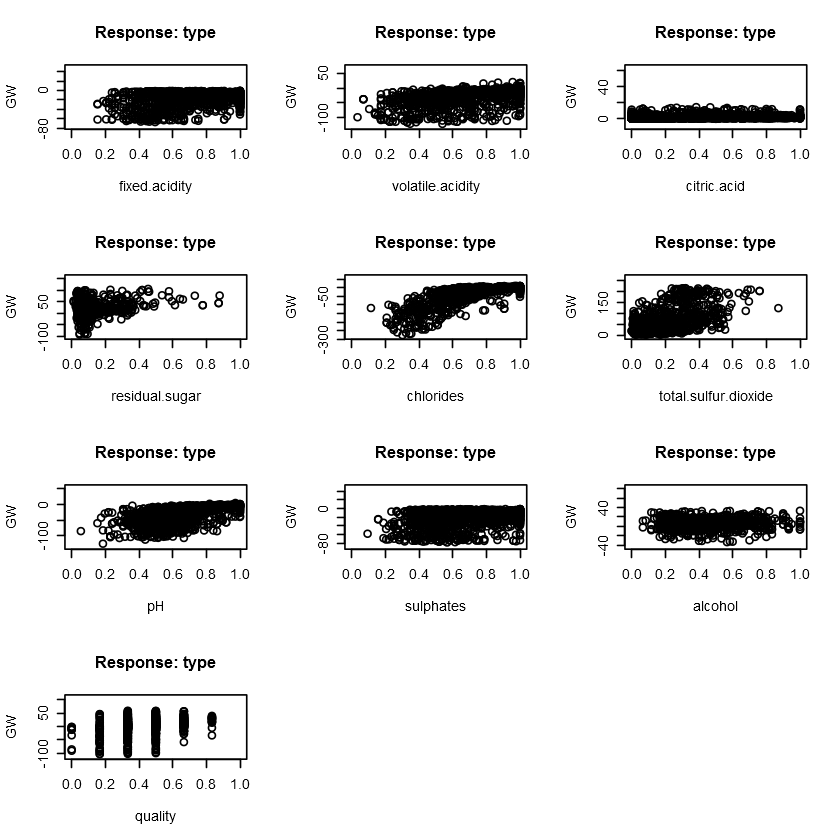

In [33]:
par(mfrow=c(4,3))
gwplot(nn,selected.covariate="fixed.acidity", min=summary1[1,9] -10, max=summary1[1,11] +50)
gwplot(nn,selected.covariate="volatile.acidity", min=summary1[2,9] -10, max=summary1[2,11] +50)
gwplot(nn,selected.covariate="citric.acid", min=summary1[3,9] -10, max=summary1[3,11] +50)
gwplot(nn,selected.covariate="residual.sugar", min=summary1[4,9] -10, max=summary1[4,11] +50)
gwplot(nn,selected.covariate="chlorides", min=summary1[5,9] -10, max=summary1[5,11] +50)

gwplot(nn,selected.covariate="total.sulfur.dioxide", min=summary1[6,9] -10, max=summary1[6,11] +50)
gwplot(nn,selected.covariate="pH", min=summary1[7,9] -10, max=summary1[7,11] +50)
gwplot(nn,selected.covariate="sulphates", min=summary1[8,9] -10, max=summary1[8,11] +50)
gwplot(nn,selected.covariate="alcohol", min=summary1[9,9] -10, max=summary1[9,11] +50)
gwplot(nn,selected.covariate="quality", min=summary1[10,9] -10, max=summary1[10,11] +50)

The distribution of the generalized weights suggests that the covariate <i>citric.acid</i> could have no effect on the type of wine since a great number of it generalized weights appears to be nearly zero and that at least the four covariates <i>residual.sugar</i>, <i>chlorides</i>, <i>total.sulfur.dioxide</i> and <i>pH</i> could have a nonlinear effect due to the fact that the variance of their generalized weights cannot be considered as constant or regular.

The generalized weight expresses the effect of each covariate xi and thus has an analogous interpretation as the regression parameter in regression models. However, the generalized weight depends on all other covariates. Its distribution indicates whether the effect of the covariate is linear since a small and regular variance suggests a linear effect.

## 42 Plotting the Neural Network selected model

In [38]:
## Creating the nn plot
plot(nn)


For reasons that I do not know, I was not able to obtain the "nn" model graphic with jupyter notebook. To achieve this graph use R-project notebook or R-Studio.

Anyway, the graph of the model is presented below using the "NeuralNetTools" library.

The weights for the selected model are given after the plot.

SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef


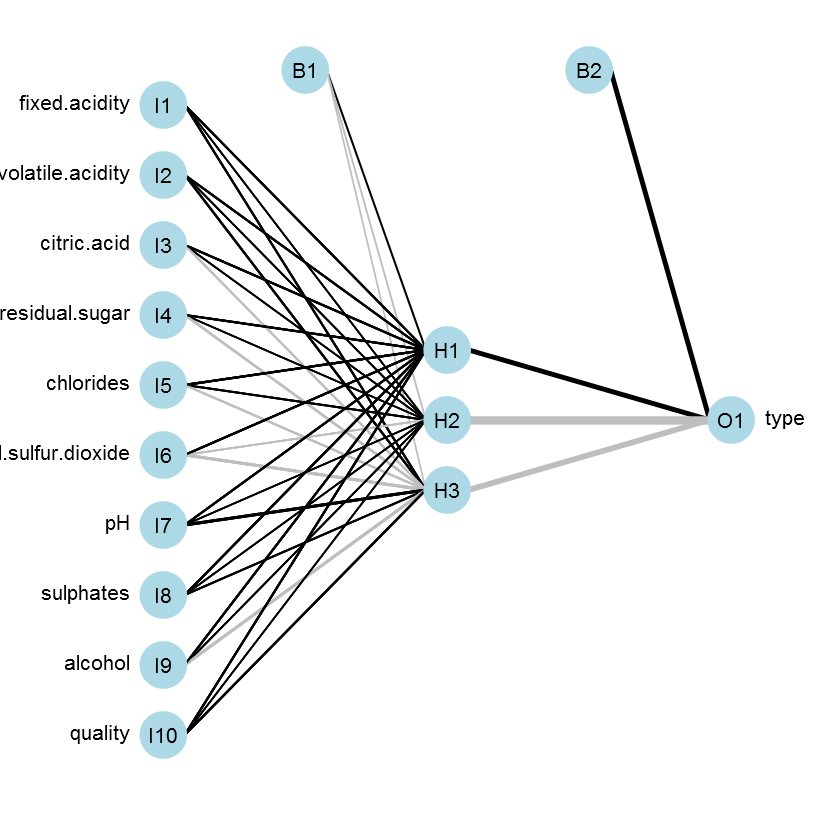

In [96]:
#import the function from Github
library(devtools)
source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')
 
#plot ouput
par(mar=numeric(4),family='serif')
plot.nnet(nn)

In [97]:
## Getting summary of fitted model1.  We get the weights for the selected nn model
nn$result.matrix

,1
error,9.08436095239
reached.threshold,0.00984112942
steps,38170.00000000000
Intercept.to.1layhid1,9.80716859417
fixed.acidity.to.1layhid1,9.70438491854
volatile.acidity.to.1layhid1,9.13140676089
citric.acid.to.1layhid1,9.78316022797
residual.sugar.to.1layhid1,9.73103504077
chlorides.to.1layhid1,13.75761640667
total.sulfur.dioxide.to.1layhid1,11.24761426718


The training process needed 38170 steps until all absolute partial derivatives of the error function were smaller than 0.01 (the default threshold). The estimated weights range from -162.34 to 79.21. For instance, the intercepts of the first hidden layer are 9.81, -6.64 and -2.55 and the ten weights leading to the first hidden neuron are estimated as 9.70, 9.78, 9.73, 13.76, 11.25, 10.42, 11.13, 10.44, and 9.88 for the covariates fixed.acidity, volatile.acidity, citric.acid, residual.sugar, chlorides, total.sulfur.dioxide, pH, sulphates,alcohol, and quality, respectively.

## V Making predictions
 

### 51 Predictions model nn on training dataset

In [102]:
out <- cbind(nn$data[,-12], nn$net.result[[1]])
head(out)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,type,nn$net.result[[1]]
3,0.7350427350,0.3478260870,0.6666666667,0.37168141593,0.4270833333,0.3389199255,0.5901639344,0.3464566929,0.3500000000,0.5,1,1
4,0.5811965812,0.2608695652,0.5333333333,0.46607669617,0.5104166667,0.6703910615,0.5136612022,0.2834645669,0.3166666667,0.5,1,1
5,0.5811965812,0.2608695652,0.5333333333,0.46607669617,0.5104166667,0.6703910615,0.5136612022,0.2834645669,0.3166666667,0.5,1,1
6,0.7350427350,0.3478260870,0.6666666667,0.37168141593,0.4270833333,0.3389199255,0.5901639344,0.3464566929,0.3500000000,0.5,1,1
7,0.4102564103,0.4173913043,0.2666666667,0.37758112094,0.3750000000,0.4841713222,0.5027322404,0.3937007874,0.2666666667,0.5,1,1
9,0.4273504274,0.3826086957,0.5666666667,0.05899705015,0.4166666667,0.4692737430,0.6338797814,0.4251968504,0.2500000000,0.5,1,1


In [103]:
head(nn$net.result,10)

3,1.0000000000
4,1.0000000000
5,1.0000000000
6,1.0000000000
7,1.0000000000
9,1.0000000000
11,1.0000000000
12,1.0000000000
13,1.0000000000
14,1.0000000000
15,1.0000000000


In [104]:
out <- cbind(nn$covariate, nn$net.result[[1]])
dimnames(out) <- list(NULL, c("ixed.acidity", "volatile.acidity", "citric.acid", "residual.sugar", "chlorides", "total.sulfur.dioxide", "pH", "sulphates", "alcohol", "quality","nn-output"))

head(out)


ixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,nn-output
0.7350427350,0.3478260870,0.6666666667,0.37168141593,0.4270833333,0.3389199255,0.5901639344,0.3464566929,0.3500000000,0.5,1
0.5811965812,0.2608695652,0.5333333333,0.46607669617,0.5104166667,0.6703910615,0.5136612022,0.2834645669,0.3166666667,0.5,1
0.5811965812,0.2608695652,0.5333333333,0.46607669617,0.5104166667,0.6703910615,0.5136612022,0.2834645669,0.3166666667,0.5,1
0.7350427350,0.3478260870,0.6666666667,0.37168141593,0.4270833333,0.3389199255,0.5901639344,0.3464566929,0.3500000000,0.5,1
0.4102564103,0.4173913043,0.2666666667,0.37758112094,0.3750000000,0.4841713222,0.5027322404,0.3937007874,0.2666666667,0.5,1
0.4273504274,0.3826086957,0.5666666667,0.05899705015,0.4166666667,0.4692737430,0.6338797814,0.4251968504,0.2500000000,0.5,1


### 52 Predictions model nn on testing dataset

In [35]:
# Compute Predictions off Test Set
predicted.nn.values <- compute(nn,dftest[-11])


In [108]:
# Check out net.result
print(head(predicted.nn.values$net.result))

           [,1]
1  1.0000000000
2  1.0000000000
8  1.0000000000
10 1.0000000000
18 0.9999998308
24 1.0000000000


In [112]:
# print validation dataset and predictions model nn by row
out2 <- cbind(dftest,predicted.nn.values$net.result)
head(out2,10)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,type,predicted.nn.values$net.result
1,0.5470085470,0.3304347826,0.6000000000,1.00000000000,0.3750000000,0.6108007449,0.3060109290,0.3622047244,0.1333333333,0.5000000000,1,1.0000000000
2,0.4273504274,0.3826086957,0.5666666667,0.05899705015,0.4166666667,0.4692737430,0.6338797814,0.4251968504,0.2500000000,0.5000000000,1,1.0000000000
8,0.5470085470,0.3304347826,0.6000000000,1.00000000000,0.3750000000,0.6108007449,0.3060109290,0.3622047244,0.1333333333,0.5000000000,1,1.0000000000
10,0.7350427350,0.2434782609,0.7166666667,0.05309734513,0.3645833333,0.4581005587,0.5464480874,0.3622047244,0.5000000000,0.5000000000,1,1.0000000000
18,0.4102564103,1.0000000000,0.8000000000,0.03539823009,0.2083333333,0.2569832402,0.6666666667,0.2677165354,0.8000000000,0.8333333333,1,0.9999998308
24,0.6495726496,1.0000000000,0.2333333333,0.05309734513,0.6770833333,0.6033519553,0.3606557377,0.4566929134,0.2166666667,0.3333333333,1,1.0000000000
31,0.8034188034,0.2782608696,0.6500000000,0.57817109145,0.3645833333,0.5065176909,0.5245901639,0.4881889764,0.3333333333,0.5000000000,1,1.0000000000
32,0.7692307692,0.1043478261,0.5666666667,0.02949852507,0.3437500000,0.1527001862,0.8196721311,0.2834645669,0.3666666667,0.5000000000,1,1.0000000000
33,0.6153846154,0.2956521739,0.6000000000,0.08554572271,0.4270833333,0.3500931099,0.5136612022,0.3464566929,0.4666666667,0.5000000000,1,1.0000000000
40,0.5982905983,0.2782608696,0.6500000000,1.00000000000,0.5000000000,0.5325884544,0.5355191257,0.2204724409,0.1000000000,0.3333333333,1,1.0000000000


### 53 Predictions model nn on new data

In [36]:
#create new data
newdata=matrix(c(8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,
6.7,0.320,0.44,2.4,0.061,34,3.29,0.80,11.6,7),
byrow=TRUE, ncol=10)


# Scaling the data (min-max scaling)
    maxs <- apply(newdata, 2, max) 
    mins <- apply(newdata, 2, min)
    sc <- as.data.frame(scale(newdata, center = mins, scale = maxs - mins))

# compute new data  predictions
covariate=matrix(c(sc[1,1], sc[1,2],sc[1,3],sc[1,4],sc[1,5],sc[1,6], sc[1,7],sc[1,8],sc[1,9],sc[1,10],
sc[2,1], sc[2,2],sc[2,3],sc[2,4],sc[2,5],sc[2,6], sc[2,7],sc[2,8],sc[2,9],sc[2,10],
sc[3,1], sc[3,2],sc[3,3],sc[3,4],sc[3,5],sc[3,6], sc[3,7],sc[3,8],sc[3,9],sc[3,10]),
byrow=TRUE, ncol=10)

new.output <- compute(nn,covariate)

new.output$net.result


1.000000000000000000000000000000
1.000000000000000000000000000000
0.000000000000000000003810191873


Now if you want use another way to get the predictions from a new test data, you can try for instance something similar to what I do in the item 7.4 of my project [MACHINE LEARNING: A comparison of supervised learning algorithms applied to the classification problem with caret R-project library](http://nbviewer.jupyter.org/github/arqmain/Machine_Learning/blob/master/R_MLearning/MLearning_Classification_Comparison_R_Caret/MLearning_Classification_Comparison_R_Caret.ipynb). 

## VI Conclusion

I used the wine data set from the UCI Machine Learning data repository. The goal is to predict wine kind which can be "white" or "red".

The original data is separated into white and red datasets. I combined them and created one additional variable: "type" indicating "white" or "red" wine.

This project develops neural Network algorithm of machine learning to classify wine "white" or "red" according to 12 variables that characterize the wine subject to classification.

Our original dataset is an imbalance one. There are 6497 registers but only 1599 (24.6%) are of the red class of wine. The model performance was evaluated using R, K fold cross-validation and the metrics Accuracy, Specificity, Recall, Precision, F1.

I do not consider two variables that appear in the original base. They could generate a problem of multicollinearity in the process of classification. So, we got rid of them. At the same time, we keep all the register of the original database but replace the upper outliers by its corresponding Threshold value which is generated for each variable using the upper limit of its Box-plot. The application of this rule does not reduce the original data size because it does not eliminate any register. So, the data size is the same as the original dataset (6497).

All the variables showed to have outliers. Some of them had a lot, some had a few. Mostly outliers were on the positive side of distributions.

Other criterions that use information of variables in the dataset to help out us with the outlier problem may reach better solutions here. Anyway, the criterion used to generate our working dataset is still better than eliminating outliers, because at least do not erase the information that lies in the other variables with no outlier presence at that data point.

The fitted model (nn) achieves very good classification metrics in all five ones, reaching at least 97%. That is, the variables of the "df" database allow discriminating in a very good way the type of wine that they represent.

Finally, I will let up to the readers to re-run the model without the possible less important predictors (citric.acid), and see happen. You can try a forward or backward inclusion or elimination of the variables and compare the model's performance. Anyway, I define the formula for this models considering the result that I already have gotten running the same problem with nnet r library. [Here you can see the nnet project results](https://github.com/arqmain/Machine_Learning/blob/master/R_MLearning/MLearning_Classification_PWine_RedWhite_NNetwork_R_KFold/README.md) for this dataset.

<hr>
By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | November 09, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]